In [3]:
import json
import matplotlib.pyplot as plt
import numpy as np
import re
%config InlineBackend.print_figure_kwargs={'facecolor' : "lightgrey"}

paths = [
    "../results/20221126_1432_traditional-vivyan.metrics",
    "../results/20221126_1435_old-roselin.metrics",
]

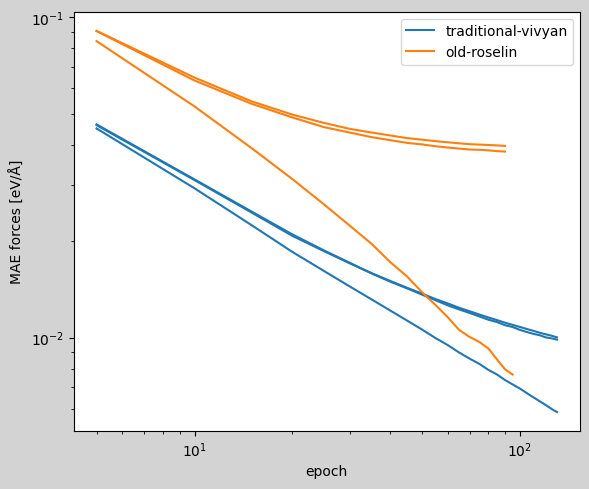

In [5]:
plt.figure(figsize=(6, 5), dpi=100)

for path in paths:
    with open(path, "rt") as f:
        jsons = [json.loads(line) for line in f.readlines()]

    tag = re.search(r"(\d{8}_\d{4})_(\w+-\w+)", path).group(2)

    x = np.array([json["epoch"] for json in jsons if json["mode"] == "eval_test"])
    y = np.array([json["mae_f"] for json in jsons if json["mode"] == "eval_test"])
    [line] = plt.plot(x[1:], y[1:], label=tag)
    x = np.array([json["epoch"] for json in jsons if json["mode"] == "eval"])
    y = np.array([json["mae_f"] for json in jsons if json["mode"] == "eval"])
    plt.plot(x[1:], y[1:], color=line.get_color())
    x = np.array([json["epoch"] for json in jsons if json["mode"] == "eval_train"])
    y = np.array([json["mae_f"] for json in jsons if json["mode"] == "eval_train"])
    plt.plot(x[1:], y[1:], color=line.get_color())


plt.legend()
# plt.title(path)
plt.xlabel("epoch")
plt.ylabel("MAE forces [eV/Å]")

plt.xscale("log")
plt.yscale("log")

plt.tight_layout()